In [2]:
#imports
import psycopg2
import pandas as pd
import numpy as np
from pylab import rcParams
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import statsmodels.api as sm

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
# Establish a connection to psycopg
conn = psycopg2.connect(
    host="containers-us-west-196.railway.app",
    port="7781",
    database="railway",
    user="postgres",
    password="EP8JoJQ90wOswb54Tny0")


In [4]:
# Execute a query and fetch all rows from a table
query = "SELECT * FROM pearson"
df_pearson = pd.read_sql(query, conn)
# Display the retrieved data
df_pearson

,id,month,year,mean_temp,date_time
0,1,JAN,1937,,1937-01
1,2,FEB,1937,,1937-02
2,3,MAR,1937,,1937-03
3,4,APR,1937,,1937-04
4,5,MAY,1937,,1937-05
...,...,...,...,...,...
913,914,FEB,2013,-4.6,2013-02
914,915,MAR,2013,0.1,2013-03
915,916,APR,2013,6.0,2013-04
916,917,MAY,2013,15.2,2013-05


In [5]:
# Execute a query and fetch all rows from a table
query = "SELECT * FROM billybishop"
df_billybishop = pd.read_sql(query, conn)
# Display the retrieved data
df_billybishop

,id,month,year,mean_temp,date_time
0,1,JAN,1840,,1840-01
1,2,FEB,1840,,1840-02
2,3,MAR,1840,1.2,1840-03
3,4,APR,1840,6.7,1840-04
4,5,MAY,1840,12.4,1840-05
...,...,...,...,...,...
1999,2000,AUG,2006,,2006-08
2000,2001,SEP,2006,,2006-09
2001,2002,OCT,2006,,2006-10
2002,2003,NOV,2006,,2006-11


In [6]:
# Execute a query and fetch all rows from a table
query = "SELECT * FROM buttonville"
df_buttonville = pd.read_sql(query, conn)
# Display the retrieved data
df_buttonville

,id,month,year,mean_temp,date_time
0,1,JAN,1986,,1986-01
1,2,FEB,1986,,1986-02
2,3,MAR,1986,,1986-03
3,4,APR,1986,,1986-04
4,5,MAY,1986,,1986-05
...,...,...,...,...,...
348,349,JAN,2015,-8.1,2015-01
349,350,FEB,2015,-13.3,2015-02
350,351,MAR,2015,-2.5,2015-03
351,352,APR,2015,7.2,2015-04


In [7]:
concatenated_df = pd.concat([df_pearson, df_buttonville, df_billybishop], ignore_index=True)


In [8]:
conn.close()


In [9]:
print(concatenated_df)

        id month  year mean_temp date_time
0        1   JAN  1937             1937-01
1        2   FEB  1937             1937-02
2        3   MAR  1937             1937-03
3        4   APR  1937             1937-04
4        5   MAY  1937             1937-05
...    ...   ...   ...       ...       ...
3270  2000   AUG  2006             2006-08
3271  2001   SEP  2006             2006-09
3272  2002   OCT  2006             2006-10
3273  2003   NOV  2006             2006-11
3274  2004   DEC  2006             2006-12

[3275 rows x 5 columns]


In [10]:
concatenated_df.head(20)

,id,month,year,mean_temp,date_time
0,1,JAN,1937,,1937-01
1,2,FEB,1937,,1937-02
2,3,MAR,1937,,1937-03
3,4,APR,1937,,1937-04
4,5,MAY,1937,,1937-05
5,6,JUN,1937,,1937-06
6,7,JUL,1937,,1937-07
7,8,AUG,1937,,1937-08
8,9,SEP,1937,,1937-09
9,10,OCT,1937,,1937-10


In [11]:
# Replace empty strings with NaN
concatenated_df['mean_temp'] = concatenated_df['mean_temp'].replace('', np.nan)

# Dropping null values 
cleaned_df = concatenated_df.dropna()
cleaned_df


,id,month,year,mean_temp,date_time
10,11,NOV,1937,3.3,1937-11
11,12,DEC,1937,-4.4,1937-12
12,13,JAN,1938,-7.2,1938-01
13,14,FEB,1938,-3.7,1938-02
14,15,MAR,1938,1.4,1938-03
...,...,...,...,...,...
3228,1958,FEB,2003,-5.1,2003-02
3229,1959,MAR,2003,0.9,2003-03
3230,1960,APR,2003,6.2,2003-04
3231,1961,MAY,2003,13.1,2003-05


In [12]:
# Convert the column to float
cleaned_df['mean_temp'] = cleaned_df['mean_temp'].astype(float)

# Convert the date_time column to datetime
cleaned_df['date_time'] = pd.to_datetime(cleaned_df['date_time'], format='%Y-%m')

# Convert the year column to int
cleaned_df['year'] = cleaned_df['year'].astype(int)

In [13]:
cleaned_df.dtypes

id                    int64
month                object
year                  int64
mean_temp           float64
date_time    datetime64[ns]
dtype: object

In [14]:
# Find the average of the mean_temp based on date_time
average_df = cleaned_df.groupby(['id','year','month', 'date_time']).mean().reset_index()
average_df

,id,year,month,date_time,mean_temp
0,3,1840,MAR,1840-03-01,1.2
1,4,1840,APR,1840-04-01,6.7
2,5,1840,MAY,1840-05-01,12.4
3,6,1840,JUN,1840-06-01,15.8
4,6,1986,JUN,1986-06-01,16.5
...,...,...,...,...,...
3207,1958,2003,FEB,2003-02-01,-5.1
3208,1959,2003,MAR,2003-03-01,0.9
3209,1960,2003,APR,2003-04-01,6.2
3210,1961,2003,MAY,2003-05-01,13.1


In [15]:
#Sort df by date_time
average_df.sort_values('date_time', ascending = True)

#Drop id column 
average_df = average_df.drop('id', axis=1)
average_df

,year,month,date_time,mean_temp
0,1840,MAR,1840-03-01,1.2
1,1840,APR,1840-04-01,6.7
2,1840,MAY,1840-05-01,12.4
3,1840,JUN,1840-06-01,15.8
4,1986,JUN,1986-06-01,16.5
...,...,...,...,...
3207,2003,FEB,2003-02-01,-5.1
3208,2003,MAR,2003-03-01,0.9
3209,2003,APR,2003-04-01,6.2
3210,2003,MAY,2003-05-01,13.1


In [16]:
#Save dataframe to csv file 
average_df.to_csv('average_temperature.csv')

In [17]:
# Create a dictory that maps that month names to the month numbers 
month_map = {'JAN': 1,
             'FEB': 2,
             'MAR': 3,
             'APR': 4,
             'MAY': 5,
             'JUN': 6,
             'JUL': 7,
             'AUG': 8 ,
             'SEP': 9 ,
             'OCT': 10,
             'NOV': 11,
             'DEC' :12}

average_df['month'] = average_df['month'].map(month_map)


In [18]:
average_df.head(5)

,year,month,date_time,mean_temp
0,1840,3,1840-03-01,1.2
1,1840,4,1840-04-01,6.7
2,1840,5,1840-05-01,12.4
3,1840,6,1840-06-01,15.8
4,1986,6,1986-06-01,16.5


In [19]:
#time series model 


In [20]:
average_df.dtypes

year                  int64
month                 int64
date_time    datetime64[ns]
mean_temp           float64
dtype: object

**Data Preprocessing**

This steps includes removing the columns year, and month, which are not needed. Setting the date_time timeline that you would like to use to base the model off and sorting the date in descending order for date_time. Next you index the time-series data so that it starts at the first of each month. 


In [21]:
# make a copy of the dataset
series = average_df[['date_time', 'mean_temp']].copy()
series

,date_time,mean_temp
0,1840-03-01,1.2
1,1840-04-01,6.7
2,1840-05-01,12.4
3,1840-06-01,15.8
4,1986-06-01,16.5
...,...,...
3207,2003-02-01,-5.1
3208,2003-03-01,0.9
3209,2003-04-01,6.2
3210,2003-05-01,13.1


In [22]:
series = series_sorted_descending = series.sort_values('date_time')
series

,date_time,mean_temp
0,1840-03-01,1.2
1,1840-04-01,6.7
2,1840-05-01,12.4
3,1840-06-01,15.8
5,1840-07-01,19.5
...,...,...
1025,2015-01-01,-8.1
1028,2015-02-01,-13.3
1031,2015-03-01,-2.5
1034,2015-04-01,7.2


In [23]:
series.dtypes

date_time    datetime64[ns]
mean_temp           float64
dtype: object

In [24]:
series.head(5)

,date_time,mean_temp
0,1840-03-01,1.2
1,1840-04-01,6.7
2,1840-05-01,12.4
3,1840-06-01,15.8
5,1840-07-01,19.5


In [25]:
latest_year = series['date_time'].max()
print('most current date:', latest_year)

earliest_year = series['date_time'].min()
print('earliest date:', earliest_year)



most current date: 2015-05-01 00:00:00
earliest date: 1840-03-01 00:00:00


In [26]:
series.head()

,date_time,mean_temp
0,1840-03-01,1.2
1,1840-04-01,6.7
2,1840-05-01,12.4
3,1840-06-01,15.8
5,1840-07-01,19.5


In [27]:
# Select the subset data from 1900 - 2014
mask = (series['date_time'] >= '1900-01-01') & (series['date_time'] <= '2014-12-01')
series = series.loc[mask]

# Reset the index 
series.set_index("date_time", inplace=True)

series

,mean_temp
date_time,
1900-01-01,-3.4
1900-02-01,-6.7
1900-03-01,-4.8
1900-04-01,7.5
1900-05-01,12.9
...,...
2014-08-01,19.5
2014-09-01,15.9
2014-10-01,10.4


In [28]:
# To simplify the analysis, instead of using the current datetime data, we will use the average mean temp value for each month, with the timestamp set as the start of each month.
y = series['mean_temp'].resample('MS').mean()

#look at 2014 data
y['2014':]


date_time
2014-01-01    -9.3
2014-02-01    -9.2
2014-03-01    -4.8
2014-04-01     5.9
2014-05-01    13.9
2014-06-01    19.3
2014-07-01    19.6
2014-08-01    19.5
2014-09-01    15.9
2014-10-01    10.4
2014-11-01     1.7
2014-12-01    -0.6
Freq: MS, Name: mean_temp, dtype: float64

**Visualizing the Mean Temperature Time Series Data**

<Axes: xlabel='date_time'>

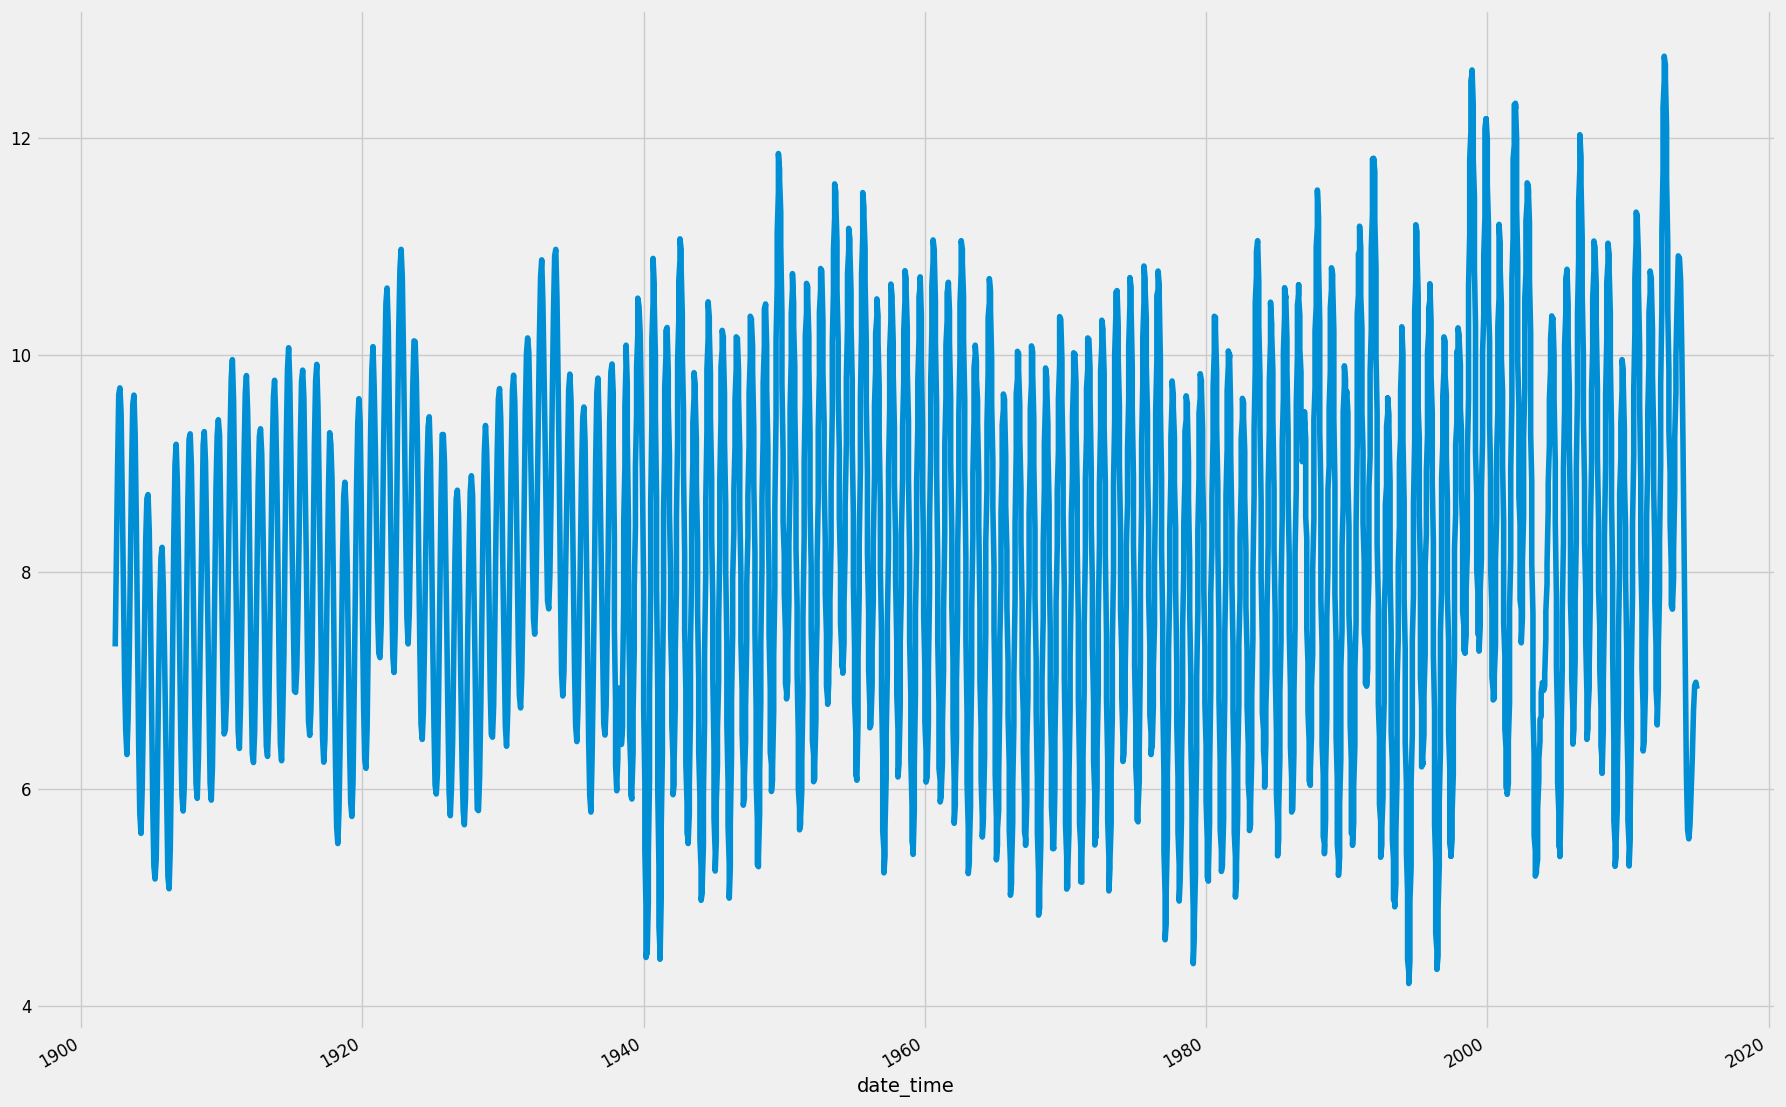

In [29]:
# Apply the Moving Average function by a subset of size 30 days.
temp_df_mean = series.mean_temp.rolling(window=30).mean()
temp_df_mean.plot(figsize=(20,15))

When we plot the data, we can observe distinct patterns. The time-series exhibits a seasonality pattern where temperatures are consistently low at the beginning of the year and high in the middle of the year. These recurring patterns provide valuable insights into the temperature trends throughout the year.

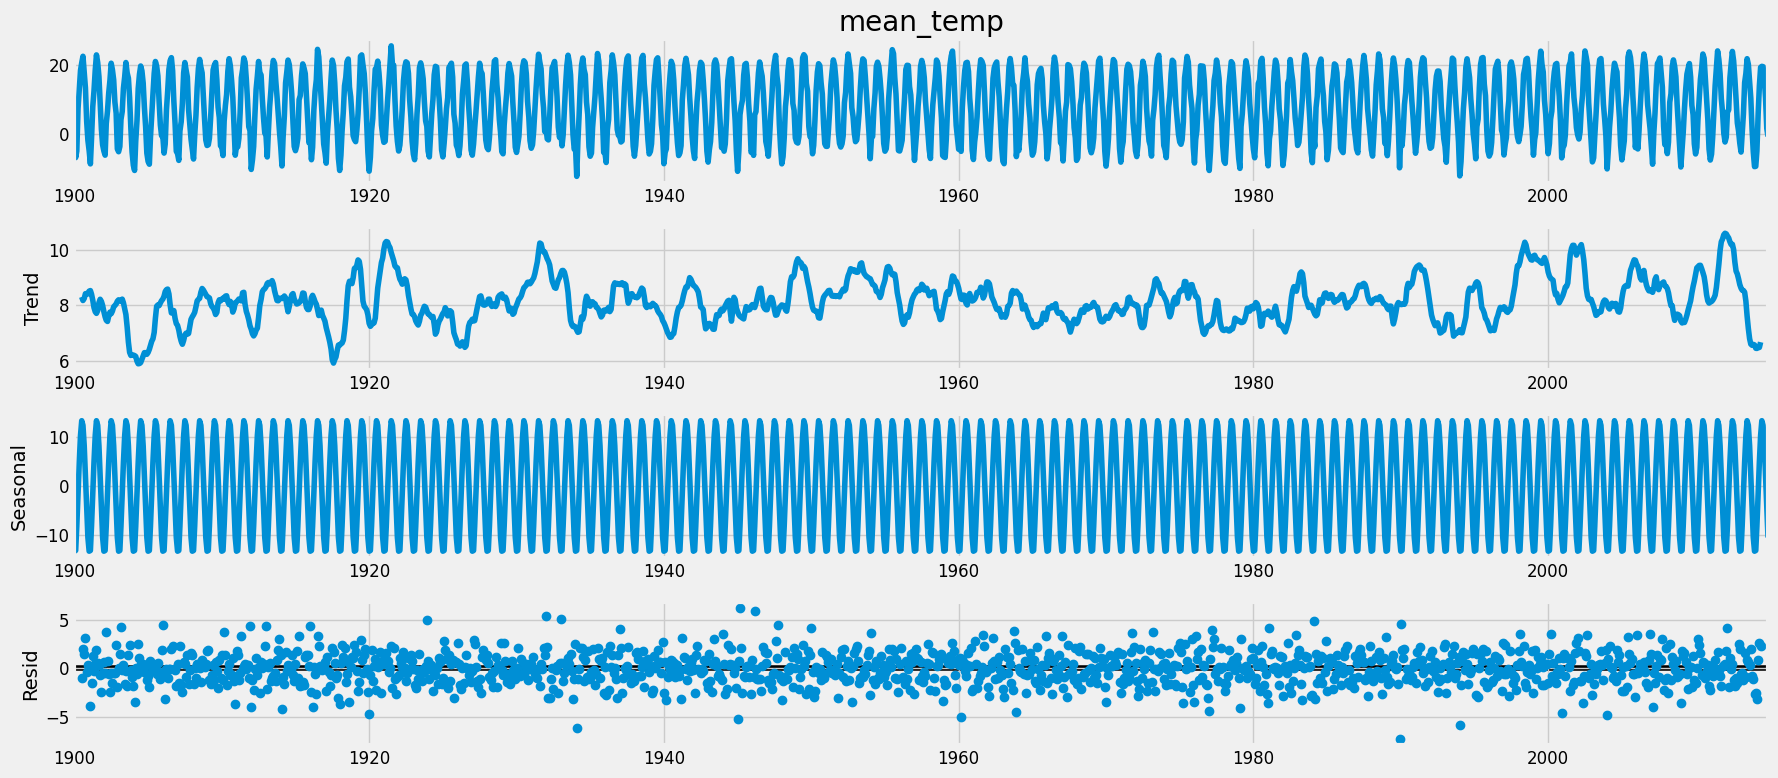

In [30]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


We can employ a technique called time-series decomposition to visualize our data. This technique helps us to analyze the individual components of the time series, including trend, seasonality, and noise. By decomposing the time series, we can gain insights into the underlying patterns and fluctuations present in the data. These plot show that the temperature is unstable along the observed seasonality. 

**Deploying the SARIMA Machine Modeling**


We will utilize SARIMA, a widely employed method for time-series forecasting. SARIMA stands for Seasonal Autoregressive Integrated Moving Average, and it incorporates seasonality, trend, and noise factors in the data. SARIMA models are represented by the notation SARIMA(p, d, q)(P, D, Q, s), where the parameters p, d, q capture the non-seasonal components, and P, D, Q, s account for the seasonal components. By considering these parameters, SARIMA enables us to effectively model and forecast time-series data.

In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)



In our time series forecasting analysis, we will employ ARIMA, an extensively utilized method. ARIMA stands for Autoregressive Integrated Moving Average, and it effectively captures seasonality, trend, and noise within the data.

ARIMA models are represented by the notation ARIMA(p, d, q), where the parameters p, d, and q correspond to the autoregressive, integrated, and moving average components, respectively. By incorporating these parameters, ARIMA enables us to effectively model and forecast time series data while considering important characteristics such as seasonality, trend, and noise.

In [32]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print('An exception occurred:', e)
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10907.668602445772
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9422.145905583915
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6475.9437732786555
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5553.378142550693
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6466.997912687491
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5603.70816731837
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6075.9734067079535
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5554.183318123498
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9489.790684146416
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8458.366261357449
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6407.0889718193
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5483.246691144807
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6396.962804104405


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5618.352204063788
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6016.963248740107
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5483.1545396917545
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8567.35253921277
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7759.67532050128
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:7059.0120179654
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:6116.828062187421


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:6939.271549921597
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6176.3876975659
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:6671.049957063385
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6116.916809108595
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:8118.2818256928285
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:7637.556629237799
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:6512.368248291814
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:5510.229174582282
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6463.274779721395
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:5571.048775431088
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6094.09760024881
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:5511.338323213531
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:8509.982881573764
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:7676.56949227658
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:6403.023328362152
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:5475.3838870627405
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6382.456914089306
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:5526.7200342408405
ARIMA(1, 0,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:5475.855096781233
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:8029.825462734481
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:7529.501221802674
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:6395.104588045029
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:5456.289718401156
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:6377.287295897335
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:5509.490417112486
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:6000.969903767579
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:5457.622592401087
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:7864.791858056271
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:7560.999257701889
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:6806.459491433872
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:5850.439062335381
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:6747.294045195173
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:5908.569291063433
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6408.067507038108
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:5851.191155871131
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:7861.151703503734
ARIMA(1, 1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:5526.255981014872
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:6010.11081090382
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:5468.76434141344


The parameters with the lowest AIC score is ARIMA(1, 1, 1)x(1, 1, 1, 12)12 -  with AIC score of 5468.76434141344.

**Fitting the SARIMA Model**

Running a model diagnostic to investigate any outliners in the dataset. In the normal Q-Q plot, we see that red KDE line follows closely with the N(0,1) normal distribution line. This is a good indication that the results are normally distributed. 

In [33]:
try:
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
except Exception as e:
    print('An exception occurred:', e)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2196      0.024      9.213      0.000       0.173       0.266
ma.L1         -0.9867      0.006   -175.104      0.000      -0.998      -0.976
ar.S.L12   -2.119e-05      0.010     -0.002      0.998      -0.019       0.019
ma.S.L12      -1.0124      0.012    -87.437      0.000      -1.035      -0.990
sigma2         3.1343      0.116     27.135      0.000       2.908       3.361


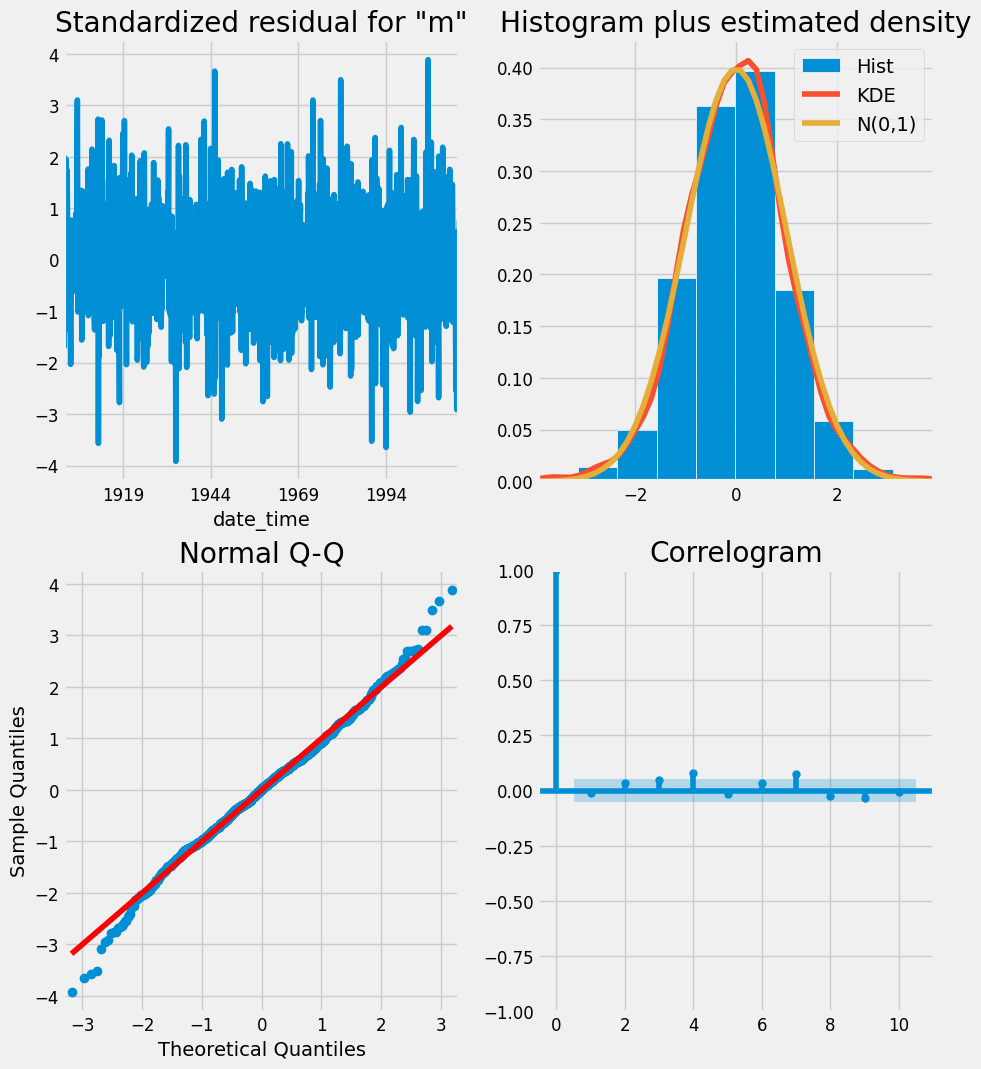

In [ ]:
results.plot_diagnostics(figsize=(10, 12))
plt.show()

**Forecasting the Weather**


To initiate the forecasts, the provided code assumes a starting point of January 2013.

By setting the dynamic parameter to False, the code ensures that each forecast is generated based on the entire historical data available up to that specific point. This approach is known as one-step ahead forecasting.

To evaluate the accuracy of our forecasts, we can plot both the actual and predicted values of the average daily temperature. To focus on the latter portion of the time series, we have applied a slicing technique to zoom in on the desired timeframe by modifying the date index.

Overall, our forecasts align with the true values very well, showing a seasonal cycle of length 365 days.

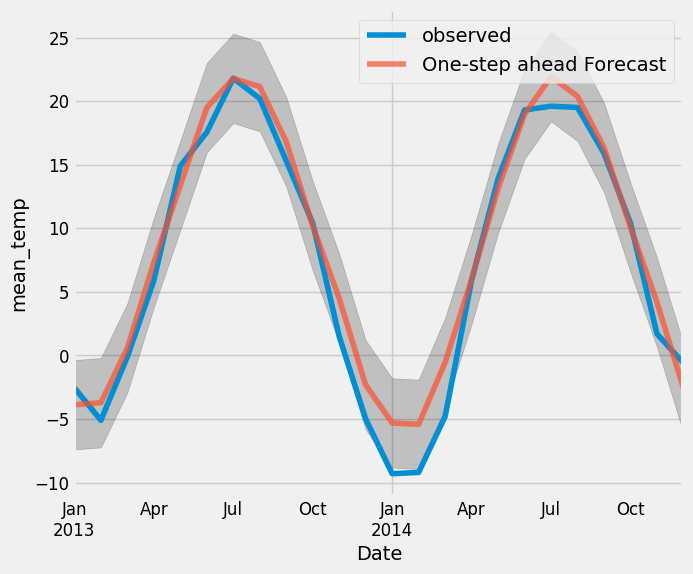

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(7, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('mean_temp')
plt.legend()
plt.show()

In [35]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4.05


In [36]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2.01


The root mean squared error is as low as 2.01 Which means we are able to predict the future forecast with a better accurancy rate. 

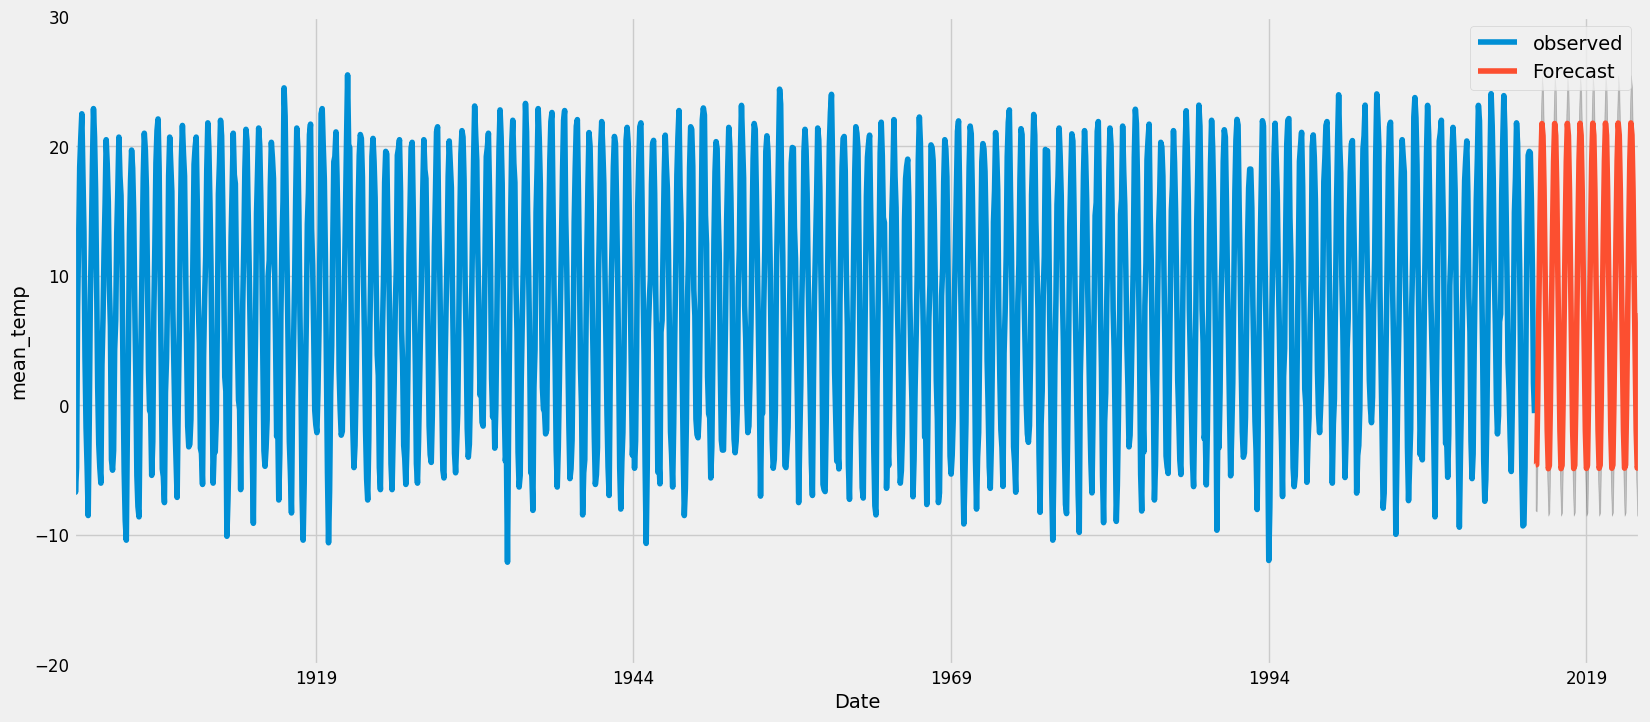

In [38]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('mean_temp')
plt.ylim([-20,30])
plt.legend()
plt.show()